# Enron

## Introduction

Enron Corporation was an American energy, commodities, and services company based in Houston, Texas. It was founded in 1985 because of a merger between Houston Natural Gas and InterNorth, both relatively small regional companies. Before its bankruptcy on December 2, 2001, Enron employed approximately 20,000 staff and was one of the world's major electricity, natural gas, communications and pulp and paper companies, with claimed revenues of nearly $101 billion during 2000. Fortune named Enron "America's Most Innovative Company" for six consecutive years.

In this project, will be built an algorithm to identify Enron Employees who may have committed fraud based on the public Enron financial and email dataset. Identify POIs.

In [1]:
import sys
import pickle
import matplotlib.pyplot
sys.path.append("../tools/")
import numpy as np 
from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

## Load the dictionary containing the dataset

with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)


C:\Users\Pro-Pc\Anaconda3\envs\py2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Understanding the data

Dataset contains information about 146 persons with 21 features for each person and only 18(12%) POIs form 35 in total. So there is the Class Imbalance Problem 

In [2]:
# number of fratures for each person

features = {}

for key, value in data_dict.iteritems():
    features[key] = len(value)
print features

{'METTS MARK': 21, 'BAXTER JOHN C': 21, 'ELLIOTT STEVEN': 21, 'CORDES WILLIAM R': 21, 'HANNON KEVIN P': 21, 'MORDAUNT KRISTINA M': 21, 'MEYER ROCKFORD G': 21, 'MCMAHON JEFFREY': 21, 'HAEDICKE MARK E': 21, 'PIPER GREGORY F': 21, 'HUMPHREY GENE E': 21, 'NOLES JAMES L': 21, 'BLACHMAN JEREMY M': 21, 'SUNDE MARTIN': 21, 'GIBBS DANA R': 21, 'LOWRY CHARLES P': 21, 'COLWELL WESLEY': 21, 'MULLER MARK S': 21, 'JACKSON CHARLENE R': 21, 'WESTFAHL RICHARD K': 21, 'WALTERS GARETH W': 21, 'WALLS JR ROBERT H': 21, 'KITCHEN LOUISE': 21, 'CHAN RONNIE': 21, 'BELFER ROBERT': 21, 'SHANKMAN JEFFREY A': 21, 'WODRASKA JOHN': 21, 'BERGSIEKER RICHARD P': 21, 'URQUHART JOHN A': 21, 'BIBI PHILIPPE A': 21, 'RIEKER PAULA H': 21, 'WHALEY DAVID A': 21, 'BECK SALLY W': 21, 'HAUG DAVID L': 21, 'ECHOLS JOHN B': 21, 'MENDELSOHN JOHN': 21, 'HICKERSON GARY J': 21, 'CLINE KENNETH W': 21, 'LEWIS RICHARD': 21, 'HAYES ROBERT E': 21, 'KOPPER MICHAEL J': 21, 'LEFF DANIEL P': 21, 'LAVORATO JOHN J': 21, 'BERBERIAN DAVID': 21, 'DET

In [3]:
#number of POIs in dataset

count = 0
for key in data_dict:
    if data_dict[key]['poi']==True:
        count+=1
print count


18


### Feature Pre-selection

For begining, is needed to create feature list and clean the data from outlayers and NaN values.

In [4]:
#print all features for one person to create feature list

print data_dict['METTS MARK']

{'salary': 365788, 'to_messages': 807, 'deferral_payments': 'NaN', 'total_payments': 1061827, 'exercised_stock_options': 'NaN', 'bonus': 600000, 'restricted_stock': 585062, 'shared_receipt_with_poi': 702, 'restricted_stock_deferred': 'NaN', 'total_stock_value': 585062, 'expenses': 94299, 'loan_advances': 'NaN', 'from_messages': 29, 'other': 1740, 'from_this_person_to_poi': 1, 'poi': False, 'director_fees': 'NaN', 'deferred_income': 'NaN', 'long_term_incentive': 'NaN', 'email_address': 'mark.metts@enron.com', 'from_poi_to_this_person': 38}


In [5]:
#create full feature list

features_list = ['poi','bonus','salary','total_payments','deferral_payments','deferred_income',
                 'director_fees','expenses','loan_advances','long_term_incentive','other',
                 'restricted_stock','restricted_stock_deferred','exercised_stock_options','total_stock_value',
                 'to_messages','from_messages','from_poi_to_this_person','from_this_person_to_poi','shared_receipt_with_poi']

From plot there is observed an outlier which corresponeds to "TOTAL" and for all features we need to remove this value. Also THE TRAVEL AGENCY IN THE PARK does not seem to be a person. In featureFormat function remove_NaN=True replaces NaNs with 0. and remove_all_zeroes=True will omit any data points for which
all the features you seek are 0.0

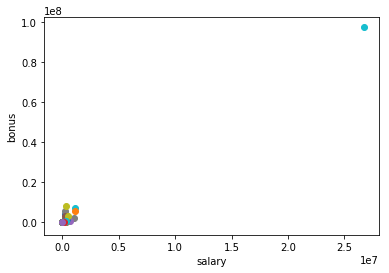

In [6]:
#NaN values will be replaced with 0 and features with all 0 values will be removed

data = featureFormat(data_dict, features_list, remove_NaN=True, remove_all_zeroes=True, remove_any_zeroes=False, sort_keys = True)

for point in data:
    salary = point[2]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

It seems there was one person with all NaN values as from 146 person left 145.

In [7]:
print len(data)

145


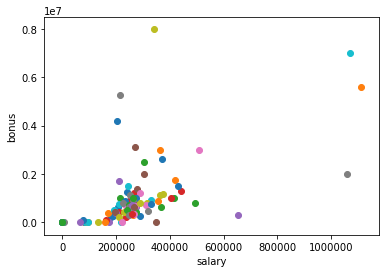

In [8]:
# remove outliers

data_dict.pop('TOTAL',0)
data_dict.pop('THE TRAVEL AGENCY IN THE PARK',0)
data_dict.pop('LOCKHART EUGENE E',0)

data = featureFormat(data_dict, features_list, remove_NaN=True, remove_all_zeroes=True, remove_any_zeroes=False, sort_keys = True)
#plot again for check

for point in data:
    salary = point[2]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

In [9]:
# check features for correlation
return_list = [] 
for feature in range(0,20):
    tmp_list = []
    for key in data:
        value = key[feature]
        tmp_list.append( float(value) )
    return_list.append( np.array(tmp_list) )   

#cor,pval  = stats.pearsonr(return_list[15],return_list[19])    
    
import scipy.stats as stats
for i in range(0,20):
    for j in range(1,20):
        cor,pval  = stats.pearsonr(return_list[i],return_list[j])
        if 1>cor>abs(0.8):
            print (features_list[i], features_list[j] )
            print cor
            print "\n"  


('total_payments', 'loan_advances')
0.964305357071


('total_payments', 'other')
0.830105039798


('loan_advances', 'total_payments')
0.964305357071


('other', 'total_payments')
0.830105039798


('exercised_stock_options', 'total_stock_value')
0.96387437986


('total_stock_value', 'exercised_stock_options')
0.96387437986


('to_messages', 'shared_receipt_with_poi')
0.881262542007


('shared_receipt_with_poi', 'to_messages')
0.881262542007




Create feature fraction_from_poi and fraction_to_poi defined as number messages to/from POI (numerator) and number of all messages to/from a person (denominator). The reason of creating these features is that POIs may be exchanging emails between each other more frequently than other people. Its interesting to know what percentage of total emails send/revived to/from POI. 

In [10]:
def computeFraction( poi_messages, all_messages ):

    fraction = 0.
    
    if poi_messages!="NaN":
        if all_messages!="NaN":
            fraction = (poi_messages*1.0)/(all_messages*1.0)

        else:
            return 0
    else:
        return 0

    return fraction


submit_dict = {}
for name in data_dict:

    data_point = data_dict[name]

    
    from_poi_to_this_person = data_point["from_poi_to_this_person"]
    to_messages = data_point["to_messages"]
    fraction_from_poi = computeFraction( from_poi_to_this_person, to_messages )
    data_point["fraction_from_poi"] = fraction_from_poi


    from_this_person_to_poi = data_point["from_this_person_to_poi"]
    from_messages = data_point["from_messages"]
    fraction_to_poi = computeFraction( from_this_person_to_poi, from_messages )
    submit_dict[name]={"from_poi_to_this_person":fraction_from_poi,
                       "from_this_person_to_poi":fraction_to_poi}
    data_point["fraction_to_poi"] = fraction_to_poi
    
    
#####################

my_data = {}
my_data.update(submit_dict)  # Modifies my_data, not data
my_data.update(data_dict) 

In [11]:
features = {}

for key, value in my_data.iteritems():
    features[key] = len(value)
print (len(features))


143


First look at all features original full list plus newly created. Check for correlation and remove ones with correlation higher than 80%. 

In [12]:
#update features list 

features_list = ['poi','bonus','salary','total_payments','deferral_payments','deferred_income',
                 'director_fees','expenses','loan_advances','long_term_incentive','other',
                 'restricted_stock','restricted_stock_deferred','exercised_stock_options','total_stock_value',
                 'to_messages','from_messages','from_poi_to_this_person','from_this_person_to_poi','shared_receipt_with_poi','fraction_from_poi','fraction_to_poi']

data = featureFormat(my_data, features_list, remove_NaN=True, remove_all_zeroes=True, remove_any_zeroes=False, sort_keys = False)

   
return_list = [] 
for feature in range(0,22):
    tmp_list = []
    for key in data:
        value = key[feature]
        tmp_list.append( float(value) )
    return_list.append( np.array(tmp_list) )   

    
import scipy.stats as stats
for i in range(0,22):
    for j in range(0,22):
        cor,pval  = stats.pearsonr(return_list[i],return_list[j])
        if 1>cor>abs(0.8):
            print (features_list[i], features_list[j] )
            print cor
            print "\n"  


('total_payments', 'loan_advances')
0.964305357071


('total_payments', 'other')
0.830105039798


('loan_advances', 'total_payments')
0.964305357071


('other', 'total_payments')
0.830105039798


('exercised_stock_options', 'total_stock_value')
0.96387437986


('total_stock_value', 'exercised_stock_options')
0.96387437986


('to_messages', 'shared_receipt_with_poi')
0.881262542007


('shared_receipt_with_poi', 'to_messages')
0.881262542007




create two sets of feature list: one including user created variables and one without these variables.
In feature list without user created (original) variables:
Can be removed 'shared_receipt_with_poi','exercised_stock_options', 'loan_advances', 'other' because of high correlation.
In feature list with user created variables:
Can be removed 'from_poi_to_this_person','from_this_person_to_poi','to_messages','from_messages' as informaion from these variables are in newly created features, also 'exercised_stock_options', 'loan_advances', 'other' because of high correlation. 

## Building algorithm

In [13]:
# Selected features list without user created variables
features_list_orig = ['poi','bonus','salary','total_payments','deferral_payments','deferred_income',
                 'director_fees','expenses','long_term_incentive',
                 'restricted_stock','restricted_stock_deferred','total_stock_value',
                 'to_messages','from_messages','from_poi_to_this_person','from_this_person_to_poi']

data_orig = featureFormat(data_dict, features_list, remove_NaN=True, remove_all_zeroes=True, remove_any_zeroes=False, sort_keys = False)
labels_orig, features_orig = targetFeatureSplit(data_orig)

In [14]:
# Selected features list

features_list = ['poi','bonus','salary','total_payments','deferral_payments','deferred_income',
                 'expenses','long_term_incentive',
                 'restricted_stock','restricted_stock_deferred','total_stock_value',
                 'shared_receipt_with_poi','fraction_from_poi','fraction_to_poi','director_fees']

data = featureFormat(my_data, features_list, remove_NaN=True, remove_all_zeroes=True, remove_any_zeroes=False)
labels, features = targetFeatureSplit(data)

Pre-selected feature list is given to poi_id.py and built variety of classifyers to select the one which gives best f1 score. Tried GaussianNB, SVM, DecisionTreeClassifier and RandomForestm and used grid search to get best tuned parameters in order to get the best perfomance for each of them. There is created function which returns the best perfomance.


###   Feature selection

**SelectKBest**
Select features according to the k highest scores. Parameters are **score_func:** Function taking two arrays X and y, and returning a pair of arrays (scores, pvalues) or a single array with scores in this case is used ch2 and **k:** Number of top features to select. In this case is tested different number of features.

In [15]:
# PCA
from sklearn.decomposition import PCA

pca=PCA()

# KBest
from sklearn.feature_selection import SelectKBest

skb = SelectKBest()

###   Feature scaling
**MinMaxScaler** is used for scaling features. It transforms features by scaling each feature to a given range.
This estimator scales and translates each feature individually such that it is in the given range on the training set, i.e. between zero and one. The main parameter is **feature_range** : tuple (min, max), default=(0, 1)

In [16]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features=scaler.fit_transform(features)

###   Classification algorithms

**Gaussian Naive Bayes (GaussianNB)**

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of independence between every pair of features.For GaussianNB the likelihood of the features is assumed to be Gaussian.

**Support vector machines (SVMs)**

The SVMs are a set of supervised learning methods used for classification, regression and outliers detection. Used C-Support Vector Classification. **Parameters used:** C : Penalty parameter C of the error term. **kernel :**  ‘poly’ and ‘rbf’. 

**Decision Trees (DTs)**

DTs are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. **Parameters used:** **criterion :** The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. **min_samples_split :** The minimum number of samples required to split an internal node. **max_depth :** The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**Ensemble methods**

The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.
Two families of ensemble methods are usually distinguished:
In averaging methods, the driving principle is to build several estimators independently and then to average their predictions. On average, the combined estimator is usually better than any of the single base estimator because its variance is reduced. By contrast, in boosting methods, base estimators are built sequentially and one tries to reduce the bias of the combined estimator. The motivation is to combine several weak models to produce a powerful ensemble. In this case is used ** Forests of randomized trees** and **AdaBoost**. 

** Forests of randomized trees**
The **RandomForest** algorithm is perturb-and-combine techniques specifically designed for trees. This means a diverse set of classifiers is created by introducing randomness in the classifier construction. The prediction of the ensemble is given as the averaged prediction of the individual classifiers. A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. **Parameters used:** **n_estimators :** The number of trees in the forest. **criterion** , **min_samples_split**,  **max_depth ** (for definitions see **Decision Trees**).

**AdaBoost**
The core principle of **AdaBoost** is to fit a sequence of weak learners (i.e., models that are only slightly better than random guessing, such as small decision trees) on repeatedly modified versions of the data. The predictions from all of them are then combined through a weighted majority vote (or sum) to produce the final prediction. **Parameters used:** **
n_estimators :** The maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early.

>**Parameters used:** Means that various values is tested for these parameters, rest use default settings in the other word these are parameters which are tuned


In [17]:
# NaiveBayes
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()

# SVM
from sklearn.svm import SVC

svm_clf = SVC()

# DecisionTree
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()

# RandomForest
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

# AdaBoost
from sklearn.ensemble import AdaBoostClassifier

ab_clf = AdaBoostClassifier()


## The Best Algorithm Selection and Parameters Tuning 

Different model training algorithms require different hyperparameters, some simple algorithms require none. Hyperparameters are parameters whose values are set before the learning process begins and their optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm. Usually a metric is chosen to measure the algorithm's performance on an independent data set and hyperparameters that maximize this measure are adopted. The cross-validation is process where a trained model is evaluated with a testing data set. The testing data set is a separate portion of the same data set from which the training set is derived. The main purpose of using the testing data set is to test the generalization ability of a trained model and is used to estimate this generalization performance. 
**GridSearchCV** is used for exhaustive search over specified parameter values for an estimator. GridSearchCV implements a “fit” and a “score” method. It also implements “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used. The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid. 
**Pipeline** of transforms with a final estimator is also used in **GridSearch**. It sequentially applies a list of transforms and a final estimator. The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters.


The define which is the best from all five algorithm with best tuned parameters from grid search is compared one by one to clearly see the deferences between the results.

In [18]:
from sklearn.cross_validation import StratifiedShuffleSplit, train_test_split, cross_val_score

# With user created variables
sk_fold = StratifiedShuffleSplit(labels, 100, random_state = 42)

# Without user created variables
sk_fold_orig = StratifiedShuffleSplit(labels_orig, 100, random_state = 42)

# Having handle to validation scores
from sklearn.metrics import (precision_score, recall_score,f1_score)

# pipelines and grid serch
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV



### NaiveBayes

In [19]:
pipeline_nb = Pipeline(steps=[('scaling',scaler),('reduce_dim', skb), ("nb", nb_clf)])
    
parameters_nb = {
'reduce_dim__k': range(5,14),
    }

gs_nb = GridSearchCV(pipeline_nb, parameters_nb, verbose=1, cv=sk_fold, scoring = 'f1')
gs_nb.fit((features), (labels))
        
print gs_nb.best_estimator_ 

print ("best_score_ :", gs_nb.best_score_)

Fitting 100 folds for each of 9 candidates, totalling 900 fits


C:\Users\Pro-Pc\Anaconda3\envs\py2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Pipeline(memory=None,
     steps=[('scaling', MinMaxScaler(copy=True, feature_range=(0, 1))), ('reduce_dim', SelectKBest(k=12, score_func=<function f_classif at 0x000000000A26D7B8>)), ('nb', GaussianNB(priors=None))])
('best_score_ :', 0.36109701409701417)


[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:    4.7s finished


### SVM

In [20]:
pipeline_svm = Pipeline(steps=[('scaling',scaler),('reduce_dim', skb),('svm', svm_clf)])
    
parameters_svm = {
    'svm__C': [1., 10, 100, 10000],
    'svm__kernel': ['rbf', 'poly'],
    'reduce_dim__k': range(5,14),
    }

gs_svm = GridSearchCV(pipeline_svm, parameters_svm, verbose=1, cv=sk_fold, scoring = 'f1')
gs_svm.fit((features), (labels))
        
print gs_svm.best_estimator_ 

print ("best_score_ :", gs_svm.best_score_)
    

Fitting 100 folds for each of 72 candidates, totalling 7200 fits
Pipeline(memory=None,
     steps=[('scaling', MinMaxScaler(copy=True, feature_range=(0, 1))), ('reduce_dim', SelectKBest(k=13, score_func=<function f_classif at 0x000000000A26D7B8>)), ('svm', SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])
('best_score_ :', 0.23785714285714285)


[Parallel(n_jobs=1)]: Done 7200 out of 7200 | elapsed:  1.0min finished


### DecisionTree

In [21]:
#With user created variables
pipeline_dt = Pipeline(steps=[('scaling',scaler),('reduce_dim', skb), ('dt', dt_clf)])
    
parameters_dt = {
    'dt__criterion': ['gini', 'entropy'],
    'dt__min_samples_split': [2, 3, 4, 5],
    'dt__max_depth': [None, 2, 5, 7, 10],
    'reduce_dim__k': range(5,14),
    }

gs_dt = GridSearchCV(pipeline_dt, parameters_dt, verbose=1, cv=sk_fold, scoring = 'f1')
gs_dt.fit((features), (labels))
        
print gs_dt.best_estimator_ 

print ("best_score_ :", gs_dt.best_score_)

Fitting 100 folds for each of 360 candidates, totalling 36000 fits
Pipeline(memory=None,
     steps=[('scaling', MinMaxScaler(copy=True, feature_range=(0, 1))), ('reduce_dim', SelectKBest(k=11, score_func=<function f_classif at 0x000000000A26D7B8>)), ('dt', DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
        ...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])
('best_score_ :', 0.39166666666666666)


[Parallel(n_jobs=1)]: Done 36000 out of 36000 | elapsed:  3.9min finished


In [22]:
#Without user created variables
pipeline_dt = Pipeline(steps=[('scaling',scaler),('reduce_dim', skb), ('dt', dt_clf)])
    
parameters_dt = {
    'dt__criterion': ['gini', 'entropy'],
    'dt__min_samples_split': [2, 3, 4, 5],
    'dt__max_depth': [None, 2, 5, 7, 10],
    'reduce_dim__k': range(5,16),
    }

gs_dt_orig = GridSearchCV(pipeline_dt, parameters_dt, verbose=1, cv=sk_fold_orig, scoring = 'f1')
gs_dt_orig.fit((features_orig), (labels_orig))
        
print gs_dt_orig.best_estimator_ 

print ("best_score_ :", gs_dt_orig.best_score_)

Fitting 100 folds for each of 440 candidates, totalling 44000 fits
Pipeline(memory=None,
     steps=[('scaling', MinMaxScaler(copy=True, feature_range=(0, 1))), ('reduce_dim', SelectKBest(k=15, score_func=<function f_classif at 0x000000000A26D7B8>)), ('dt', DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
        ...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])
('best_score_ :', 0.40000000000000002)


[Parallel(n_jobs=1)]: Done 44000 out of 44000 | elapsed:  4.9min finished


### RandomForest

In [23]:
pipeline_rf = Pipeline(steps=[('scaling',scaler),('reduce_dim', skb), ('rf', rf_clf)])
    
parameters_rf = {
    'rf__n_estimators': [5, 7, 10, 14],
    'rf__criterion': ['gini', 'entropy'],
    'rf__min_samples_split': [2, 5, 10],
    'rf__max_depth': [None, 2, 5, 10],    
    'reduce_dim__k': range(5,14),
    }

gs_rf = GridSearchCV(pipeline_rf, parameters_rf, verbose=1, cv=sk_fold, scoring = 'f1')
gs_rf.fit((features), (labels))
        
print gs_rf.best_estimator_ 

print ("best_score_ :", gs_rf.best_score_)

Fitting 100 folds for each of 864 candidates, totalling 86400 fits
Pipeline(memory=None,
     steps=[('scaling', MinMaxScaler(copy=True, feature_range=(0, 1))), ('reduce_dim', SelectKBest(k=13, score_func=<function f_classif at 0x000000000A26D7B8>)), ('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])
('best_score_ :', 0.31338095238095237)


[Parallel(n_jobs=1)]: Done 86400 out of 86400 | elapsed: 43.1min finished


### AdaBoost

In [24]:
pipeline_ada = Pipeline(steps=[('scaling',scaler),('reduce_dim', skb), ('ab', ab_clf)])
    
parameters_ada = {
    'ab__n_estimators': [25, 50, 100],
    'reduce_dim__k': range(5,14),
    }
    
gs_ada = GridSearchCV(pipeline_ada, parameters_ada, verbose=1, cv=sk_fold, scoring = 'f1')
gs_ada.fit((features), (labels))
        
print gs_ada.best_estimator_ 

print ("best_score_ :", gs_ada.best_score_)
           

Fitting 100 folds for each of 27 candidates, totalling 2700 fits


[Parallel(n_jobs=1)]: Done 2700 out of 2700 | elapsed:  6.5min finished


Pipeline(memory=None,
     steps=[('scaling', MinMaxScaler(copy=True, feature_range=(0, 1))), ('reduce_dim', SelectKBest(k=10, score_func=<function f_classif at 0x000000000A26D7B8>)), ('ab', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=None))])
('best_score_ :', 0.315)


###  cross-validation

Stratified **ShuffleSplit** cross-validator is used, which provides train/test indices to split data in train/test sets.
This cross-validation object is a merge of StratifiedKFold and ShuffleSplit, which returns stratified randomized folds. The folds are made by preserving the percentage of samples for each class. Stratification is the process of rearranging the data as to ensure each fold is a good representative of the whole. **Parameters used:** **y**-labels of samples.
**n_iter** -Number of re-shuffling and splitting iterations.  **random_state**-If int, random_state is the seed used by the random number generator.

The function below split the sample to train/test sets and checks performance of classifier

In [25]:
PERF_FORMAT_STRING = "\
\tAccuracy: {:>0.{display_precision}f}\tPrecision: {:>0.{display_precision}f}\t\
Recall: {:>0.{display_precision}f}\tF1: {:>0.{display_precision}f}\tF2: {:>0.{display_precision}f}"
RESULTS_FORMAT_STRING = "\tTotal predictions: {:4d}\tTrue positives: {:4d}\tFalse positives: {:4d}\
\tFalse negatives: {:4d}\tTrue negatives: {:4d}"

def test_classifier(clf, data, feature_list, folds = 1000):
    #data = featureFormat(dataset, feature_list, sort_keys = True)
    labels, features = targetFeatureSplit(data)
    cv = StratifiedShuffleSplit(labels, folds, random_state = 42)  
    true_negatives = 0
    false_negatives = 0
    true_positives = 0
    false_positives = 0
    for train_idx, test_idx in sk_fold: 
        features_train = []
        features_test  = []
        labels_train   = []
        labels_test    = []
        for ii in train_idx:
            features_train.append( features[ii] )
            labels_train.append( labels[ii] )
        for jj in test_idx:
            features_test.append( features[jj] )
            labels_test.append( labels[jj] )
        
        ### fit the classifier using training set, and test on test set
        clf.fit(features_train, labels_train)
        predictions = clf.predict(features_test)
        
        for prediction, truth in zip(predictions, labels_test):
            if prediction == 0 and truth == 0:
                true_negatives += 1              
            elif prediction == 0 and truth == 1:
                false_negatives += 1
            elif prediction == 1 and truth == 0:
                false_positives += 1
            elif prediction == 1 and truth == 1:
                true_positives += 1
            else:
                print "Warning: Found a predicted label not == 0 or 1."
                print "All predictions should take value 0 or 1."
                print "Evaluating performance for processed predictions:"
                break
                
    try:
        total_predictions = true_negatives + false_negatives + false_positives + true_positives
        accuracy = 1.0*(true_positives + true_negatives)/total_predictions
        precision = 1.0*true_positives/(true_positives+false_positives)
        recall = 1.0*true_positives/(true_positives+false_negatives)
        f1 = 2.0 * true_positives/(2*true_positives + false_positives+false_negatives)
        f2 = (1+2.0*2.0) * precision*recall/(4*precision + recall)
        print clf
        print PERF_FORMAT_STRING.format(accuracy, precision, recall, f1, f2, display_precision = 5)
        print RESULTS_FORMAT_STRING.format(total_predictions, true_positives, false_positives, false_negatives, true_negatives)
        print ""
    except:
        print "Got a divide by zero when trying out:", clf
        print "Precision or recall may be undefined due to a lack of true positive predicitons."

Check perfomance of  NaiveBayes, DecisionTree and AdaBoos, as ther best scores are close to each other. (see above)

In [26]:
test_classifier(gs_nb.best_estimator_  , data, features_list, folds = 1000)

Pipeline(memory=None,
     steps=[('scaling', MinMaxScaler(copy=True, feature_range=(0, 1))), ('reduce_dim', SelectKBest(k=12, score_func=<function f_classif at 0x000000000A26D7B8>)), ('nb', GaussianNB(priors=None))])
	Accuracy: 0.56067	Precision: 0.21491	Recall: 0.86500	F1: 0.34428	F2: 0.53894
	Total predictions: 1500	True positives:  173	False positives:  632	False negatives:   27	True negatives:  668



As shown below tunde parameters with original feature set is different but F1 score is higher with the set including user selected variables. As final set of features the one using user created variables is selected.

In [27]:
# With user created featue set
test_classifier(gs_dt.best_estimator_  , data, features_list, folds = 1000)
gs_dt.best_estimator_.steps[2][1]

Pipeline(memory=None,
     steps=[('scaling', MinMaxScaler(copy=True, feature_range=(0, 1))), ('reduce_dim', SelectKBest(k=11, score_func=<function f_classif at 0x000000000A26D7B8>)), ('dt', DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
        ...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])
	Accuracy: 0.83800	Precision: 0.41296	Recall: 0.51000	F1: 0.45638	F2: 0.48711
	Total predictions: 1500	True positives:  102	False positives:  145	False negatives:   98	True negatives: 1155



DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [28]:
# original featue set
test_classifier(gs_dt_orig.best_estimator_  , data_orig, features_list_orig, folds = 1000)
gs_dt_orig.best_estimator_.steps[2][1]

Pipeline(memory=None,
     steps=[('scaling', MinMaxScaler(copy=True, feature_range=(0, 1))), ('reduce_dim', SelectKBest(k=15, score_func=<function f_classif at 0x000000000A26D7B8>)), ('dt', DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
        ...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])
	Accuracy: 0.84733	Precision: 0.42328	Recall: 0.40000	F1: 0.41131	F2: 0.40445
	Total predictions: 1500	True positives:   80	False positives:  109	False negatives:  120	True negatives: 1191



DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [29]:
test_classifier(gs_ada.best_estimator_  , data, features_list, folds = 1000)

Pipeline(memory=None,
     steps=[('scaling', MinMaxScaler(copy=True, feature_range=(0, 1))), ('reduce_dim', SelectKBest(k=10, score_func=<function f_classif at 0x000000000A26D7B8>)), ('ab', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=None))])
	Accuracy: 0.85200	Precision: 0.42143	Recall: 0.29500	F1: 0.34706	F2: 0.31383
	Total predictions: 1500	True positives:   59	False positives:   81	False negatives:  141	True negatives: 1219



As a result the best perfomance is given by DecisionTreeClassifier with 12 features. Presented list of final selected features with their importance k best and DecisionTree. The created variable fraction_from_poi is in the final feature list.

In [30]:
##k best

mask=gs_dt.best_estimator_.steps[1][1].get_support()
new_features = [] # The list of your K best features

for bool, feature in zip(mask, features_list):
    if bool:
        new_features.append(feature)

#print selected features and their scores
for i in range(0,len(new_features)):        
    print (new_features[i], gs_dt.best_estimator_.named_steps['reduce_dim'].pvalues_[i] )


('poi', 3.2001180371896341e-05)
('bonus', 3.1275207924891641e-05)
('salary', 0.0034921520690395277)
('deferral_payments', 0.68377293511464798)
('deferred_income', 0.010085033773645459)
('expenses', 0.057702561238666773)
('long_term_incentive', 0.0076260532052459173)
('restricted_stock_deferred', 0.0028746715404537539)
('total_stock_value', 0.75002695370502681)
('shared_receipt_with_poi', 3.0718610875263968e-06)
('fraction_from_poi', 0.0079445345883141817)


Finally the best perfomance shown by DecisionTree with k=10 variables, containing created.
Was tested variables in range 5 to 15, i.e at least 5 features to full feature list. 

The best 10 variable list with their scores:

('poi', 11.129479151071294)
('bonus', 11.196268305382173)
('salary', 2.7678986261219913)
('deferral_payments', 5.3040593155079989)
('deferred_income', 5.9062230784659526)
('expenses', 2.611274332028505)
('long_term_incentive', 6.5769490767620624)
('restricted_stock_deferred', 14.691308652557398)
('total_stock_value', 5.495321379933408)
('fraction_from_poi', 8.2430164382598381)


**Accuracy: 0.84   Precision: 0.40   Recall: 0.49   F1: 0.44   F2: 0.47**

Precision: 0.40 means that only in 40% cases our prediction is truly POI and the rest 60% is the false alarm. Recall: is a ratio of  truely predicted positive and real number of positives  in the other words our prediction is correctly identifying POIs only in 49% cases. F1 score is a measure of a test's accuracy and it is 44% in this case. According these numbers identifing of POIs is not possible with good pressision.

In [31]:
%run tester.py

('poi', 11.129479151071294)
('bonus', 11.196268305382173)
('salary', 2.7678986261219913)
('deferral_payments', 5.3040593155079989)
('deferred_income', 5.9062230784659526)
('expenses', 2.611274332028505)
('long_term_incentive', 6.5769490767620624)
('restricted_stock_deferred', 14.691308652557398)
('total_stock_value', 5.495321379933408)
('fraction_from_poi', 8.2430164382598381)
Pipeline(memory=None,
     steps=[('scaling', MinMaxScaler(copy=True, feature_range=(0, 1))), ('reduce_dim', SelectKBest(k=10, score_func=<function f_classif at 0x000000000A26D7B8>)), ('dt', DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
        ...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])
	Accuracy: 0.83480	Precision: 0.40285	Recall: 0.49550	F1: 0.44439	F2: 0.47371
	Total predictions: 15000	True positives:  991	False positives: 1469	False negatives: 1009	True negatives: 115